<a href="https://colab.research.google.com/github/graciousgift/Assignment-file/blob/main/Gift's%20Copy_of_Assignment_9_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Name: Gift Maren

<br>

## Skin Care Product Analyses.


In [1]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
#%load_ext lab_black

> Data source is from **Kaggle**. 

- The data can be found [here](https://www.kaggle.com/datasets/nenamalikah/nlp-ulta-skincare-reviews).

### Data Dictionary

```
- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.
```

### Objectives

```
1. Exploratory Data Analysis.

2. Research and experimentation.

3. Sentiments Analysis.

```


<br><hr>

###  Qs 1. Explore the data. What can the reviews tell us about the products? Do most buyers have common skincare issues? What issues did the products help solve or exacerbate?


In [2]:
# Reading the given data
df = pd.read_csv("Ulta Skincare Reviews.csv")
df.head(3)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


Displayed above is the first 3 rows of the loaded data

In [3]:
# Checking the product column
df["Product"].unique()

array(['Multi-Vitamin Thermafoliant', 'Hydro Masque Exfoliant',
       'Daily Superfoliant', 'Daily Microfoliant'], dtype=object)

I checked the variables of the product column in the data

In [4]:
# Checking for missing values in the data
df.isna().sum()

Review_Title        0
Review_Text         2
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

There are missing values in the data set, 2 from Review_Text and 1 from Review_location

In [5]:
# Filing the missing values
df.fillna("NULL", inplace=True)

Replaceing missing values with NULL

In [6]:
# Checking for missing values in the data
df.isna().sum()

Review_Title        0
Review_Text         0
Verified_Buyer      0
Review_Date         0
Review_Location     0
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

No more missing values in the data set

In [7]:
# Dropping the unnecessary columns
col_to_drp = [
    "Verified_Buyer",
    "Review_Date",
    "Review_Location",
    "Brand",
    "Scrape_Date",
]
df.drop(columns=col_to_drp, inplace=True)
df.head()

,Review_Title,Review_Text,Review_Upvotes,Review_Downvotes,Product
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,0,0,Multi-Vitamin Thermafoliant
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,0,0,Multi-Vitamin Thermafoliant
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,0,0,Multi-Vitamin Thermafoliant
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,0,0,Multi-Vitamin Thermafoliant
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",0,0,Multi-Vitamin Thermafoliant


Here I droped some columns

In [8]:
# Dictionary of English Contractions
contractions_dict = {
    "ain't": "are not",
    "'s": " is",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "that'd": "that would",
    "that'd've": "that would have",
    "there'd": "there would",
    "there'd've": "there would have",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what've": "what have",
    "when've": "when have",
    "where'd": "where did",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who've": "who have",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
}

# Regular expression for finding contractions
contractions_re = re.compile("(%s)" % "|".join(contractions_dict.keys()))


# Function for expanding contractions
def expand_contractions(text, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]

    return contractions_re.sub(replace, text)


# Expanding Contractions in the reviews
df["Review_Text"] = df["Review_Text"].apply(lambda x: expand_contractions(x))

In [9]:
df["Cleaned_Review"] = df["Review_Text"].apply(lambda x: x.lower())

In [10]:
import string

df["Cleaned_Review"] = df["Cleaned_Review"].apply(
    lambda x: re.sub("[%s]" % re.escape(string.punctuation), "", x)
)

# Removing extra spaces
df["Cleaned_Review"] = df["Cleaned_Review"].apply(lambda x: re.sub(" +", " ", x))

df["Cleaned_Review"].head()

0                                                                                                                                                         love using this on my face while in the shower heats up and gives a light scrub nicely
1                                                                                                                                                              even better than the daily microfoliant i am obsessed my skin is so much smoother
2                                                                                                                                                                       enjoy this product so much i look forward to using it really feels great
3    i have never tried anything like this before and i love it when you apply it to your face you get a little shot of warm that feels so good the scrub seems very gritty but the only side effects i have encountered have been positive ones
4                                   

In the above steps i cleaned the review text by removing punctuation marks and making all reviews lower case.

In [11]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words

df["lemmatized"] = df["Cleaned_Review"].apply(
    lambda x: " ".join(
        [token.lemma_ for token in list(nlp(x)) if (token.is_stop == False)]
    )
)

Tokenize review text above and enable the application of other functions, such as functions to extract common word collocations, or words that frequently appear together.

In [12]:
df_grouped = (
    df[["Product", "lemmatized"]].groupby(by="Product").agg(lambda x: " ".join(x))
)
df_grouped.head()

,lemmatized
Product,
Daily Microfoliant,recently notice appearance blackhead month normally past try exfoliate product zero change appearance try time notice major difference 2 time try return purchase run buy notice change skin product smell like powder milk product content weight come moisture absorbent packet find inside good scrub tacha rice polish comparable r scrub use use tiny bit mix water scrub leave skin soft ready skincare routine african american natural product lush product address issue like goto beautiful skin come night product great patience purge skip start 3 week ago week skin break bad assumption exfoliate gunk underneath skin barrier week 3 see great result small blemish pore small forehead nose excited skin look like 3 week amazing product struggle acne scar year product diminish away cleanser moisturizer clay mask get 4 product dermalogica change skin life finally feel comfortable skin la roche posay cleanser 1802 vitamin c oil wonder skin exfoliator 1802 oil week notice huge difference skin dark s...
Daily Superfoliant,buy whim store great review description say multiple time great remove impurity wash twice ton makeup come toner hydrate guess moderately dry skin yeat long mean cleanser immediately dry expensive product drug store product cleaning balm 2 year feel face get clean twice sit worried go try omg shock go like regular cleanser rub rinse room temp water feel immediately moisturize face feel light airy clean little gord long way value amazing exfoliant incredible gentle use day make skin feel like blank canvas moisturize like esthetician recommend product series chemical peel absolutely love product sensitive combo skin hydration moisture face feel amazing definitely feel remove dirt day highly recommend fellow combo skin peep finally moisturize cleanser clean moisturize expect product clean moisturize time face red blotchy look wash great product spot change essential 1st step daily skincare routine try skin cleanser take cake light weight get job strip skin use precleanse product leave...
Hydro Masque Exfoliant,masque gentle easy use masque feel tend dry break time skin feel hydrated rinse hear good thing exfoliant not wait use second time buy exfoliant love feel make skin feel mask 4x far month need little apply go smoothly combination cream dermalogica cleanser feel difference skin texture bit 4 star sure exfoliate mask week feel exfoliate clean skin keep super hydrate skin look visibly clear bright use not think size last long love good mask definitely feel like smooth soft skin reduce price skin silky soft skin feel great masque soft hydrated skin great product add routine mask exfoliate rough sensitive skin buildup keratin pore mask gently dissolve rough leave skin super smooth hydrated love bead soft dissolve fast rough skin use week improvement skin look feel creamy masque great exfoliant feel subtle exfoliation work need use week good consider price subtle cucumber smell calm love bubble good holy grail love gfiny bubble pop use mask event glow smooth skin receive defective bottle...
Multi-Vitamin Thermafoliant,love face shower heat give light scrub nicely well daily microfoliant obsess skin smooth enjoy product look forward feel great try like love apply face little shot warm feel good scrub gritty effect encounter positive one exfoliate nicely give smooth skin irritation reaction skin highly recommend buy love use wet dry control abrasive leave face soft drench vitamin absolutely love truly like multivitamin thermafoliant product 7 year happy purchase directly long available ulta store definitely love skin face feel well excelent love product exfoliate skin help dry winter face use shower twice weekly usually whilst wait conditioner soak andor exfoliate body super sensitive skin prone blotch oily t zone product amazing thing skin hydrate slough dead skin cell cause zero irritation leave skin glow like deep facial not live makeup go smooth great product feel gently exfoliate recommen

In [13]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words=list(stopwords), analyzer="word")
data = cv.fit_transform(df_grouped["lemmatized"])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
df_dtm.index = df_grouped.index
df_dtm.head()

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


,0025,005,045,10,100,100x,1010,1015,10x,12,120,1210,12mins,12th,12x,12xdaily,13,1314,14,15,1520,15yr,169,17,1802,18mo,1month,1st,1x,20,200,2010,2017,2018,2023,20yr,21,23,23x,24,25,29,2nd,2times,2week,2x,2xweek,30,3045,31,32,34,34xs,35,37,3hours,3rd,3step,3timesweek,3x,40,41,42,43,44,45,47,48,4th,4x,50,500,50sec,51,510,53,54,55,57,58,59,5min,5th,5x,60,62,63,67,69,6i,6years,710,75,aa,ab,aback,ability,abit,able,abrasive,abrasiveness,absolute,absolutely,absorb,absorbent,absorbing,absorption,abt,accelerated,accept,accident,accidentally,accidently,acclimate,acclimatise,accommodate,accompany,accomplish,accutane,achieve,acid,acne,acnefighte,acneprone,acride,act,acting,action,activate,activation,active,actively,activiate,activity,actual,actually,actualy,acutane,ad,add,addicted,addition,additional,addl,addle,address,adjust,admit,adore,adsorb,adult,advanced,advent,adverse,advertise,advertising,advice,advise,advisor,aesthetician,afer,aferre,affair,affect,affective,afford,affordable,afraid,african,aftar,aftermath,afterward,afterwardsit,afterwhich,afterword,againbecause,age,aged,agent,agesmart,aggitate,aggravate,aggravating,aggressive,aggressively,aggrivate,agin,aging,ago,agree,agressively,aha,ahah,ahead,ahhh,ahs,aid,aina,air,airport,airy,aka,albeit,ale,alergic,algae,alive,allantoin,allegedly,allergen,allergic,allergy,alleviate,alll,allleft,allow,almond,aloe,alongside,alot,alpha,alreadybought,alright,alter,alternate,alternative,alternatively,altitude,altogether,amaaaaaaze,amaaaze,amazamaze,amaze,amazed,amazing,amazingly,amd,american,analysis,anastasia,andor,anesthetist,angeles,angry,annnnnnd,annoyance,annoying,anount,ans,answer,anti,antiage,antiageing,antibiotic,antioxidant,antipollutant,anybody,anymore,anythingjust,anytime,anyways,apart,ape,aphysical,apparent,apparently,appeal,appealing,appear,appearance,apple,application,applie,apply,appointment,apposite,appreciate,apprehensive,approach,appropriate,approx,approximately,apricot,aproaching,arbonne,area,areound,areretinol,arm,armpit,aroma,arrange,arrive,arsenal,artificial,artist,asap,ash,ashe,aside,ask,aspect,assist,associate,assume,assumption,assure,astetician,astonish,astonishingly,astringent,aswell,athome,atleast,atm,attach,attempt,attention,august,aunt,author,automatic,automatically,available,aveda,aveeno,average,avid,avoid,aw,awake,award,aware,away,awesome,awful,awhile,awkward,az,baby,babybottom,babys,bac,background,backstory,backup,bacon,bacteria,bad,badand,badescu,badly,badlymade,bag,baglocker,bake,baking,balance,balanced,ball,balm,bamboo,bandwagon,bang,bar,barbie,bare,barely,barnacle,barrier,base,basic,basically,basis,bath,bathroom,battering,battle,bay,bc,bday,bead,beadgrain,bear,beard,beat,beautician,beautiful,beautifully,beautifuly,beautify,beauty,bed,bedridden,bedtime,bee,beeuse,beforebedtime,beforeit,beforemy,begin,beginning,begone,behold,believe,believer,beneath,beneficial,benefit,benzoyl,bestselle,bette,bettet,beware,bha,bhasaha,bi,bien,big,bigand,bin,binchotan,biolumin,bioluminc,biore,bird,birthday,biscuity,bit,bite,biught,biweekly,black,blackhead,blah,blank,blaze,ble,bleed,blemish,blend,bless,blessing,blind,blissfully,block,blockage,blog,blogging,bloom,blotch,blotchiness,blotchy,blow,blue,blueheartblueheart,blur,blush,boba,body,bomb,bond,bonus,bonusa,book,boom,boost,booster,booty,borderline,bormally,boss,botanical,bothanical,bother,botheredy,bottle,bottlefor,bounce,bouncy,bowl,box,boy,boyfriend,bp,brain,brake,bran,brand,brandt,brant,bravo,breach,break,breakdown,breakout,breakouts,breakoutswhich,breath,breathe,...,tap,tape,tapioca,tara,target,task,tat,tatcha,tbh,tea,team,tear,tears,teaspoon,technique,ted,teen,teenage,teenager,teeny,tel,tell,temp,temperature,temple,temporary,tend,tendency,tengo,term,terrible,terribly,territory,test,testament,tester,testing,texas,text,texte,texturally,texture,textureacne,textured,textureless,texturepatchiness,texturize,thai,thank,thankful,thankfully,therafter,therapist,thermafoliant,thermafoliantit,thermal,thermofoliant,thick,thickness,thin,thin

Converting the data set to vectors using Sklearn

In [14]:
df_dtm.shape

(4, 4183)

The Vectorise data has a shape of 4 rows and 4183 Columns

In [15]:
d = cv.vocabulary_
d.items()

dict_items([('recently', 2976), ('notice', 2477), ('appearance', 269), ('blackhead', 433), ('month', 2369), ('normally', 2466), ('past', 2632), ('try', 3875), ('exfoliate', 1322), ('product', 2850), ('zero', 4173), ('change', 626), ('time', 3779), ('major', 2202), ('difference', 1056), ('return', 3095), ('purchase', 2898), ('run', 3155), ('buy', 559), ('skin', 3351), ('smell', 3396), ('like', 2103), ('powder', 2784), ('milk', 2305), ('content', 824), ('weight', 4072), ('come', 748), ('moisture', 2351), ('absorbent', 104), ('packet', 2606), ('find', 1446), ('inside', 1929), ('good', 1639), ('scrub', 3219), ('tacha', 3675), ('rice', 3106), ('polish', 2747), ('comparable', 762), ('use', 3966), ('tiny', 3787), ('bit', 428), ('mix', 2338), ('water', 4050), ('leave', 2074), ('soft', 3429), ('ready', 2955), ('skincare', 3357), ('routine', 3144), ('african', 168), ('american', 237), ('natural', 2404), ('lush', 2182), ('address', 145), ('issue', 1974), ('goto', 1648), ('beautiful', 387), ('nigh

In [16]:
from sklearn.model_selection import train_test_split

# Target
TARGET = "Product"
TEST_SIZE = 0.1
RANDOM_STATE = 123

X = df["lemmatized"]
y = df[TARGET]

# Split data
X_train, x_validate, y_train, y_validate = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

X_train.shape, x_validate.shape

((3735,), (415,))

Splitting data to test and train

In [17]:
X_train.head()

2722    dermalogica product buy get marry june 2023 sub par skin want change start get monthly facial dermalogica brand use figure start daily microfoliant game changer people want bright tone small pore negative smell well kinda smell like rice make sense rice base matter month preclense special cleansing gel daily microfoliant intensive moisture repair moisturizer budget switch dermalogica regret
3134                                                                                                                                                                                                                                                                              love product far sensitive skin harsh whatsoever use feel skin smooth look glowy great application definitely recommend product
1750                                                                                                                                                                                                

In [18]:
y_train.head()

2722        Daily Microfoliant
3134        Daily Microfoliant
1750        Daily Superfoliant
1016    Hydro Masque Exfoliant
1945        Daily Superfoliant
Name: Product, dtype: object

In [19]:
from sklearn.feature_extraction.text import CountVectorizer


# Fit
X_new = cv.fit_transform(X).toarray()
X_new

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
len(cv.vocabulary_)

4183

In [21]:
len(cv.vocabulary_)

4183

In [22]:
cv.vocabulary_

{'love': 2166,
 'face': 1372,
 'shower': 3314,
 'heat': 1737,
 'light': 2099,
 'scrub': 3219,
 'nicely': 2437,
 'daily': 910,
 'microfoliant': 2287,
 'obsess': 2502,
 'skin': 3351,
 'smooth': 3407,
 'enjoy': 1233,
 'product': 2850,
 'look': 2145,
 'forward': 1526,
 'feel': 1422,
 'great': 1668,
 'try': 3875,
 'like': 2103,
 'apply': 273,
 'little': 2124,
 'shot': 3310,
 'warm': 4033,
 'good': 1639,
 'gritty': 1678,
 'effect': 1192,
 'encounter': 1224,
 'positive': 2770,
 'exfoliate': 1322,
 'irritation': 1968,
 'reaction': 2950,
 'highly': 1767,
 'recommend': 2981,
 'buy': 559,
 'use': 3966,
 'wet': 4082,
 'dry': 1148,
 'control': 831,
 'abrasive': 99,
 'leave': 2074,
 'soft': 3429,
 'drench': 1138,
 'vitamin': 4018,
 'absolutely': 102,
 'truly': 3872,
 'multivitamin': 2389,
 'thermafoliant': 3736,
 'year': 4152,
 'happy': 1708,
 'purchase': 2898,
 'directly': 1071,
 'long': 2142,
 'available': 323,
 'ulta': 3902,
 'store': 3556,
 'definitely': 969,
 'excelent': 1296,
 'help': 1751,
 '

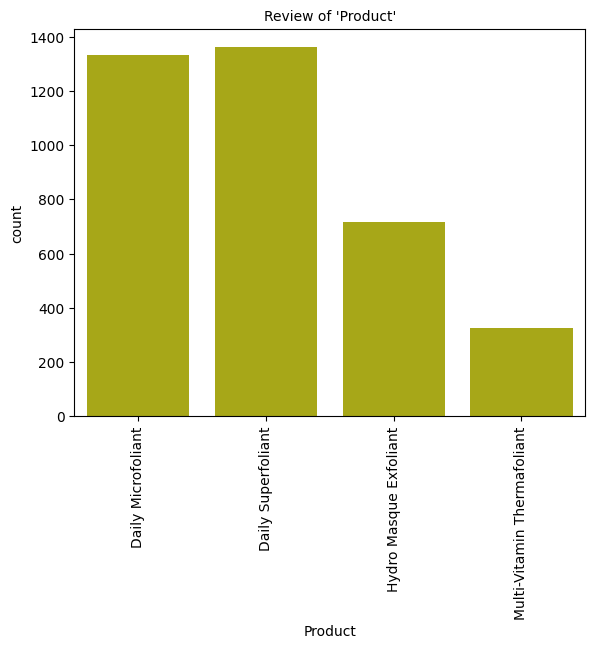

In [23]:
data_1 = pd.concat([X_train, y_train], axis="columns")

# Distribution of the target
sns.countplot(x=TARGET, data=data_1, color="y")
plt.title(f"Review of {TARGET!r}", size=10)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

From the chart above Daily Supperfoliant has the highest count, followed by Daily Microfoliant and the least count goes to Multi_Vitamin Thermofoliant. this shows that the buyers of Daily Supperfolliant and Daily Microfoliant has similar skin care issues, and their review of the product is that it leaves their skin feeling soft, smooth, silky, and clean.

###  Qs 2. Create a wordcloud showing the words/phrases commonly associated with each product.

**Importing modules needed**

In [24]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

**loading Review_Text column and showing**

In [25]:
df.head(3)

,Review_Title,Review_Text,Review_Upvotes,Review_Downvotes,Product,Cleaned_Review,lemmatized
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,0,0,Multi-Vitamin Thermafoliant,love using this on my face while in the shower heats up and gives a light scrub nicely,love face shower heat give light scrub nicely
1,You need this,Even better than the daily microfoliant. I am obsessed. My skin is SO MUCH smoother,0,0,Multi-Vitamin Thermafoliant,even better than the daily microfoliant i am obsessed my skin is so much smoother,well daily microfoliant obsess skin smooth
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,0,0,Multi-Vitamin Thermafoliant,enjoy this product so much i look forward to using it really feels great,enjoy product look forward feel great


In [26]:
df.groupby("Product").sum()

<ipython-input-26-71d0ef9937f5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Product").sum()


,Review_Upvotes,Review_Downvotes
Product,,
Daily Microfoliant,1180,332
Daily Superfoliant,920,171
Hydro Masque Exfoliant,36,9
Multi-Vitamin Thermafoliant,318,157


Joining and counting words in lemmatized columns

In [27]:
text_1 = " ".join(review for review in df.lemmatized)
print(
    "There are {} words in the combination of all the review text after lemmatizing.".format(
        len(text_1)
    )
)

There are 538629 words in the combination of all the review text after lemmatizing.


Showing Product variables below

In [28]:
df.Product.unique()

array(['Multi-Vitamin Thermafoliant', 'Hydro Masque Exfoliant',
       'Daily Superfoliant', 'Daily Microfoliant'], dtype=object)

**displaying wordcloud below showing product, skin, use, good, feel and love as the commonly used words associated to the Multi-Vitamin Thermafoliant product**

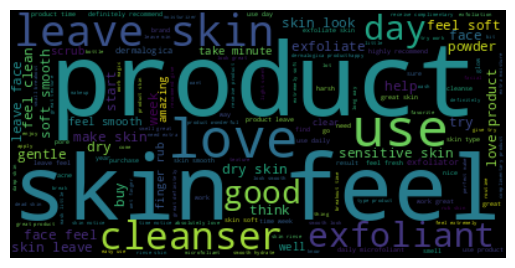

In [29]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(
    [
        "Multi-Vitamin Thermafoliant",
    ]
)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text_1)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

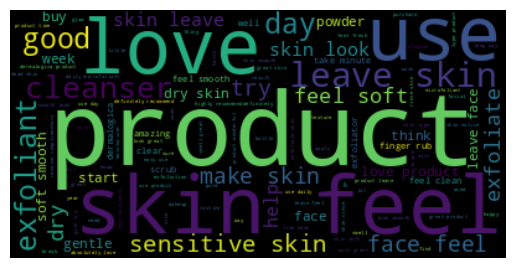

In [30]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(
    [
        "Hydro Masque Exfoliant",
    ]
)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text_1)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Display a wordcloud showing use, love, product, skin and feel as the commonly used words associated to the Daily Superfoliant product**

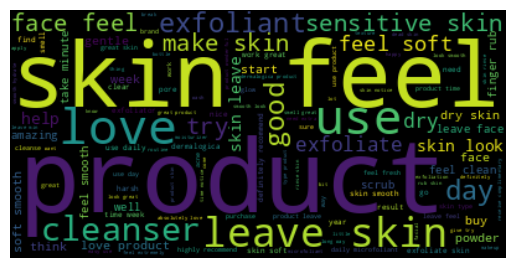

In [31]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(
    [
        "Daily Superfoliant",
    ]
)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text_1)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**display a wordcloud showing skin, love, feel, cleanser, product and leave as the commonly used words associated to the Daily Microfoliant product**

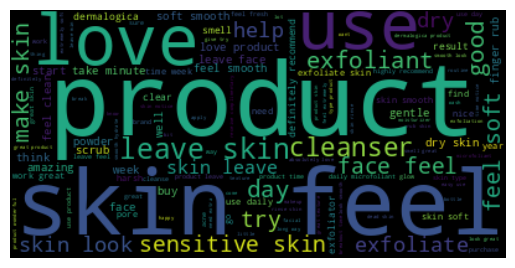

In [32]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(
    [
        "Daily Microfoliant",
    ]
)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text_1)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Qs 3. Perform sentiment analysis. Build a ML model that can predict whether a review is positive or negative.

In [33]:
from sklearn.model_selection import train_test_split

# Target
TARGET = "Product"
TEST_SIZE = 0.1
RANDOM_STATE = 123

X = df["lemmatized"]
y = df[TARGET]

# Split data
X_train, x_validate, y_train, y_validate = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

X_train.shape, x_validate.shape

((3735,), (415,))

In [34]:
X_train.head()

2722    dermalogica product buy get marry june 2023 sub par skin want change start get monthly facial dermalogica brand use figure start daily microfoliant game changer people want bright tone small pore negative smell well kinda smell like rice make sense rice base matter month preclense special cleansing gel daily microfoliant intensive moisture repair moisturizer budget switch dermalogica regret
3134                                                                                                                                                                                                                                                                              love product far sensitive skin harsh whatsoever use feel skin smooth look glowy great application definitely recommend product
1750                                                                                                                                                                                                

In [35]:
x_validate.head()

1804                                                                                                      good cleanser dry skin skin product like silk use pair daily microfoliant
2448    love product great job clean skin daily morning special cleansing gel deep pore clear pollution congestion receive product complimentary review purpose probably repurchase
1135                                                                                                                                                           work great skin type
1982                                                                                                             skin soft blackhead disappear careful scrub hard recommend day use
3345                                                                                               work remove blackhead bead dissolve right away use pair favorite facial cleanser
Name: lemmatized, dtype: object

In [36]:
y_train.head()

2722        Daily Microfoliant
3134        Daily Microfoliant
1750        Daily Superfoliant
1016    Hydro Masque Exfoliant
1945        Daily Superfoliant
Name: Product, dtype: object

In [37]:
# Preprocess the text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


vectorizer = CountVectorizer(stop_words="english")

# Count the words (vector of numbers!)
X_tr = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(x_validate)

X_tr  # Sparse matrix is used because most of the values in the vector are 0s

<3735x3995 sparse matrix of type '<class 'numpy.int64'>'
	with 62647 stored elements in Compressed Sparse Row format>

In [41]:
# Train the model
nb_model = MultinomialNB()
nb_model.fit(X_tr, y_train)
P_pred = nb_model.predict(X_val)
P_proba = nb_model.predict_proba(X_val)

In [44]:
import transformers
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")
data = list(P_pred)
sentiment_pipeline(data)

ModuleNotFoundError: ignored

Transformers has failed to import and am not sure on how to resolve this


In [ ]:
#roc_auc score, precision